In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel(r'E:\Data\ML Project\Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [4]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.drop('Route',axis=1,inplace=True)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,Null,12648


## Source and Destination

In [9]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [10]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [11]:
def del_dupicate(df):
    df['Destination']=df['Destination'].replace('New Delhi','Delhi')
    df['Additional_Info']=df['Additional_Info'].str.replace('Null ', 'Null')
    return df

df=del_dupicate(df)

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,Null,12648


In [13]:
Bl=df[df['Source']=='Banglore']

In [14]:
Bl['Additional_Info'].unique()

array(['Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [15]:
Bl['Destination'].unique()

array(['Delhi'], dtype=object)

In [16]:
Kl=df[df['Source']=='Kolkata']

In [17]:
Kl['Destination'].unique()

array(['Banglore'], dtype=object)

In [18]:
De=df[df['Source']=='Delhi']

In [19]:
De['Destination'].unique()

array(['Cochin'], dtype=object)

In [20]:
Ch=df[df['Source']=='Chennai']

In [21]:
Ch['Destination'].unique()

array(['Kolkata'], dtype=object)

In [22]:
Mb=df[df['Source']=='Mumbai']

In [23]:
Mb['Destination'].unique()

array(['Hyderabad'], dtype=object)

# Insights:
- All flights that start from Banglore end in Delhi similarly 
- flights that start from Kolkata the final destination is Banglore
- flights that start from Delhi the final destination is Cochin
- flights that start from Chennai the final destination is Kolkata
- flights that start from Mumbai the final destination is Hyderbad

### Addition Infomation of flight

In [24]:
df['Additional_Info'].unique()

array(['Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

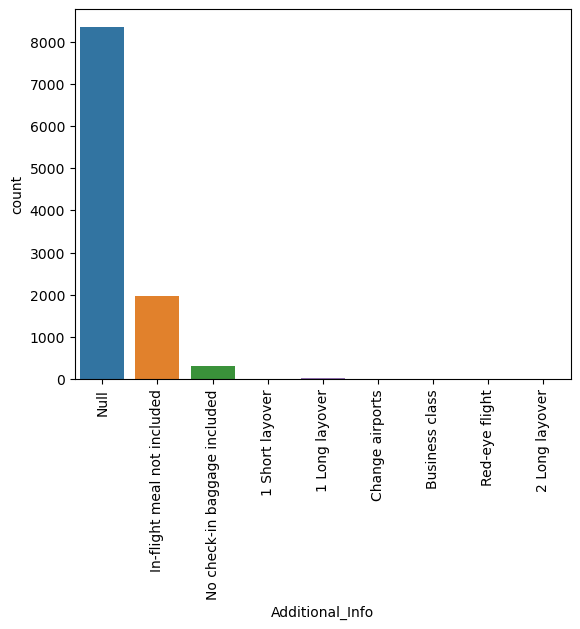

In [25]:
sns.countplot(data=df, x='Additional_Info')
plt.xticks(rotation='vertical')
plt.show()

In [26]:
df.drop('Additional_Info', axis=1, inplace=True)

In [27]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648


### Total Stops of flight

In [28]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-stop','0')
df['Total_Stops']=df['Total_Stops'].str.replace(' stops','')
df['Total_Stops']=df['Total_Stops'].str.replace(' stop','')

In [29]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,0,12648


In [30]:
df['Total_Stops'].unique()

array(['0', '2', '1', '3', nan, '4'], dtype=object)

In [31]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [32]:
df.drop(index=9039, inplace=True)

In [33]:
df['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [34]:
df['Total_Stops']=pd.to_numeric(df['Total_Stops'])

<Axes: xlabel='Total_Stops', ylabel='count'>

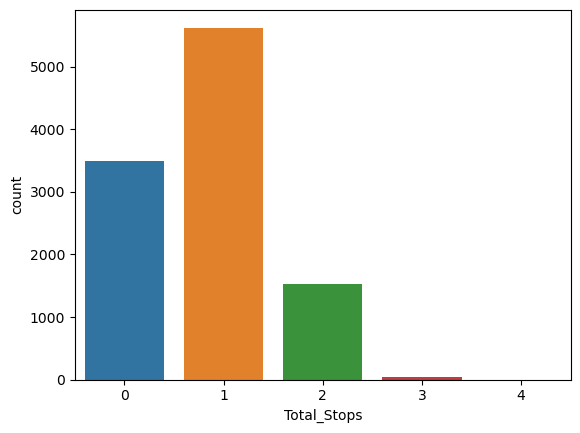

In [35]:
sns.countplot(x=df['Total_Stops'])

In [36]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<Axes: xlabel='Source', ylabel='count'>

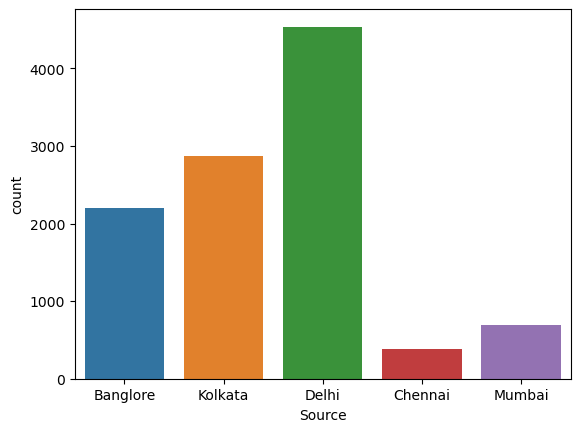

In [37]:
sns.countplot(x=df['Source'])

# Insights:
- Majority of the fights starts from Delhi

<Axes: xlabel='Total_Stops', ylabel='Price'>

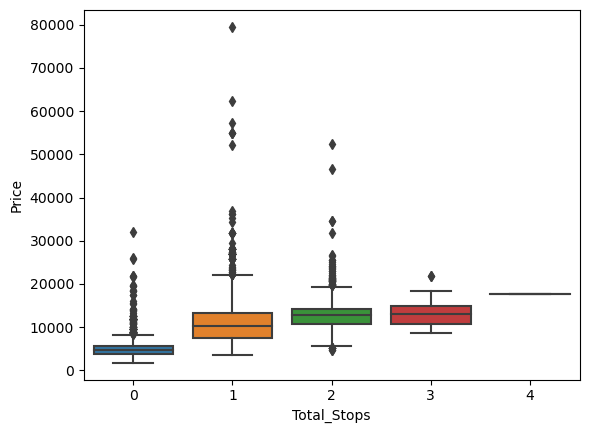

In [38]:
sns.boxplot(y='Price', x='Total_Stops', data= df)

### Price and total number of stops Insights:
- Zero stop flights are the cheapest
- The flight with 1 stop is costliest.
- The flight with 3 stops has the highest mean price.

In [39]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,0,12648


In [40]:
def Time(data):
    Arrival_Time=[]
    for i in df["Arrival_Time"]:
        Arrival_Time.append(i[:5])
    data['Arrival_Time'] = Arrival_Time
    data['Arrival_Time_hour']=pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_minute']=pd.DatetimeIndex(data['Arrival_Time']).minute
    data['Duration_Total_Hour'] = data['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval).round(2)
    return df

Time(df)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hour,Arrival_Time_minute,Duration_Total_Hour
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10,2h 50m,0,3897,1,10,2.83
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,13,15,7.42
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25,19h,2,13882,4,25,19.00
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,23,30,5.42
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1,13302,21,35,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,22,25,2.50
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,23,20,2.58
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229,11,20,3.00
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,0,12648,14,10,2.67


In [41]:
df.drop('Duration', axis=1, inplace=True)

In [42]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Arrival_Time_hour,Arrival_Time_minute,Duration_Total_Hour
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10,0,3897,1,10,2.83
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2,7662,13,15,7.42
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25,2,13882,4,25,19.00
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1,6218,23,30,5.42
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,1,13302,21,35,4.75
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,0,4107,22,25,2.50
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,0,4145,23,20,2.58
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,0,7229,11,20,3.00
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,0,12648,14,10,2.67


In [43]:
eda_df=df.drop(['Arrival_Time_hour','Arrival_Time_minute','Dep_Time','Arrival_Time'], axis=1)

In [44]:
eda_df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Duration_Total_Hour
0,IndiGo,24/03/2019,Banglore,Delhi,0,3897,2.83
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,7.42
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,19.00
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,5.42
4,IndiGo,01/03/2019,Banglore,Delhi,1,13302,4.75
...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,0,4107,2.50
10679,Air India,27/04/2019,Kolkata,Banglore,0,4145,2.58
10680,Jet Airways,27/04/2019,Banglore,Delhi,0,7229,3.00
10681,Vistara,01/03/2019,Banglore,Delhi,0,12648,2.67


In [45]:
def date(data):
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    return data

In [46]:
eda_df= date(eda_df)

In [47]:
eda_df.drop('Date_of_Journey', axis=1, inplace=True)

In [48]:
eda_df

,Airline,Source,Destination,Total_Stops,Price,Duration_Total_Hour,day,month,weekday
0,IndiGo,Banglore,Delhi,0,3897,2.83,24,3,6
1,Air India,Kolkata,Banglore,2,7662,7.42,1,5,2
2,Jet Airways,Delhi,Cochin,2,13882,19.00,9,6,6
3,IndiGo,Kolkata,Banglore,1,6218,5.42,12,5,6
4,IndiGo,Banglore,Delhi,1,13302,4.75,1,3,4
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,2.50,9,4,1
10679,Air India,Kolkata,Banglore,0,4145,2.58,27,4,5
10680,Jet Airways,Banglore,Delhi,0,7229,3.00,27,4,5
10681,Vistara,Banglore,Delhi,0,12648,2.67,1,3,4


In [49]:
eda_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [50]:
def airline(data):
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business','Jet Airways',data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Multiple carriers Premium economy','Multiple carriers',data['Airline'])
    data['Airline']= np.where(data['Airline'] == 'Vistara Premium economy','Vistara',data['Airline'])
    return data

eda_df=airline(eda_df)

In [51]:
eda_df

,Airline,Source,Destination,Total_Stops,Price,Duration_Total_Hour,day,month,weekday
0,IndiGo,Banglore,Delhi,0,3897,2.83,24,3,6
1,Air India,Kolkata,Banglore,2,7662,7.42,1,5,2
2,Jet Airways,Delhi,Cochin,2,13882,19.00,9,6,6
3,IndiGo,Kolkata,Banglore,1,6218,5.42,12,5,6
4,IndiGo,Banglore,Delhi,1,13302,4.75,1,3,4
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,2.50,9,4,1
10679,Air India,Kolkata,Banglore,0,4145,2.58,27,4,5
10680,Jet Airways,Banglore,Delhi,0,7229,3.00,27,4,5
10681,Vistara,Banglore,Delhi,0,12648,2.67,1,3,4


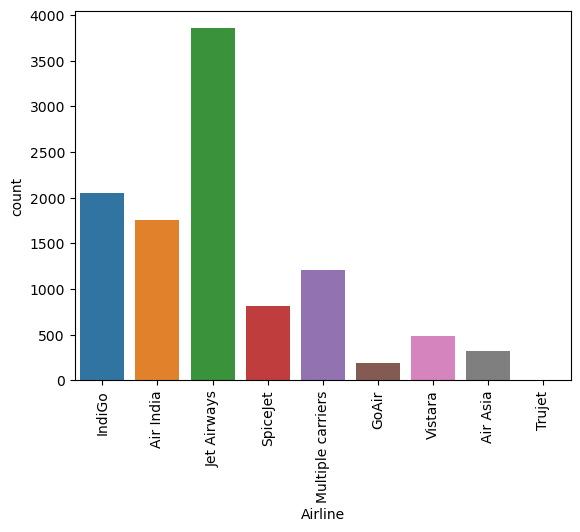

In [52]:
sns.countplot(x=eda_df['Airline'] )
plt.xticks(rotation='vertical')
plt.show()

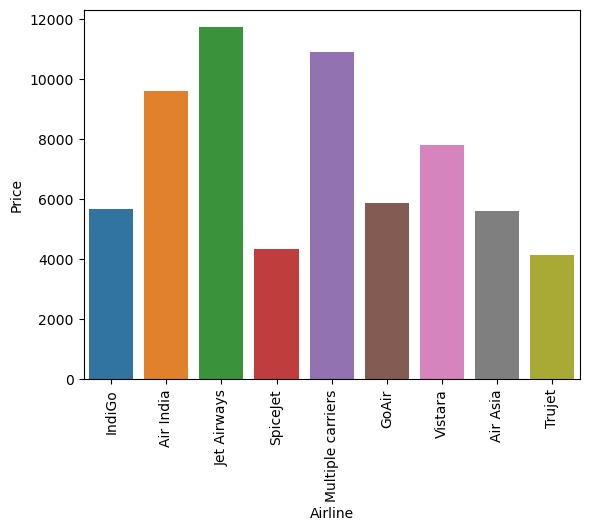

In [53]:
sns.barplot(x=eda_df['Airline'], y=eda_df['Price'], ci=False)
plt.xticks(rotation='vertical')
plt.show()

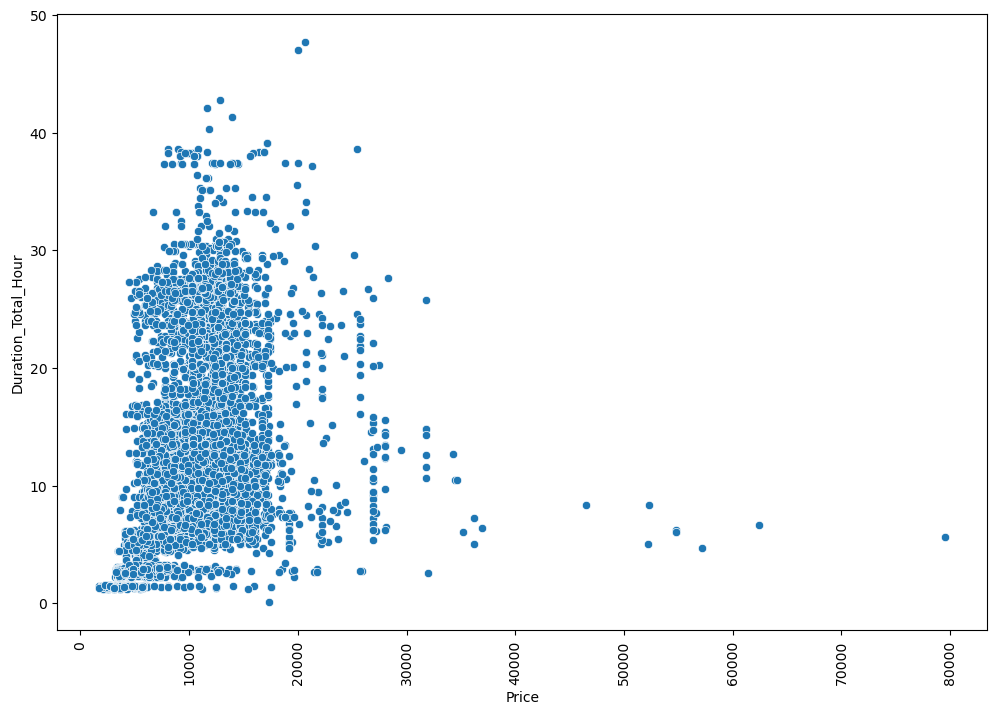

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot( x=eda_df['Price'],y=eda_df['Duration_Total_Hour'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
eda_df=eda_df[eda_df['Price']<50000]

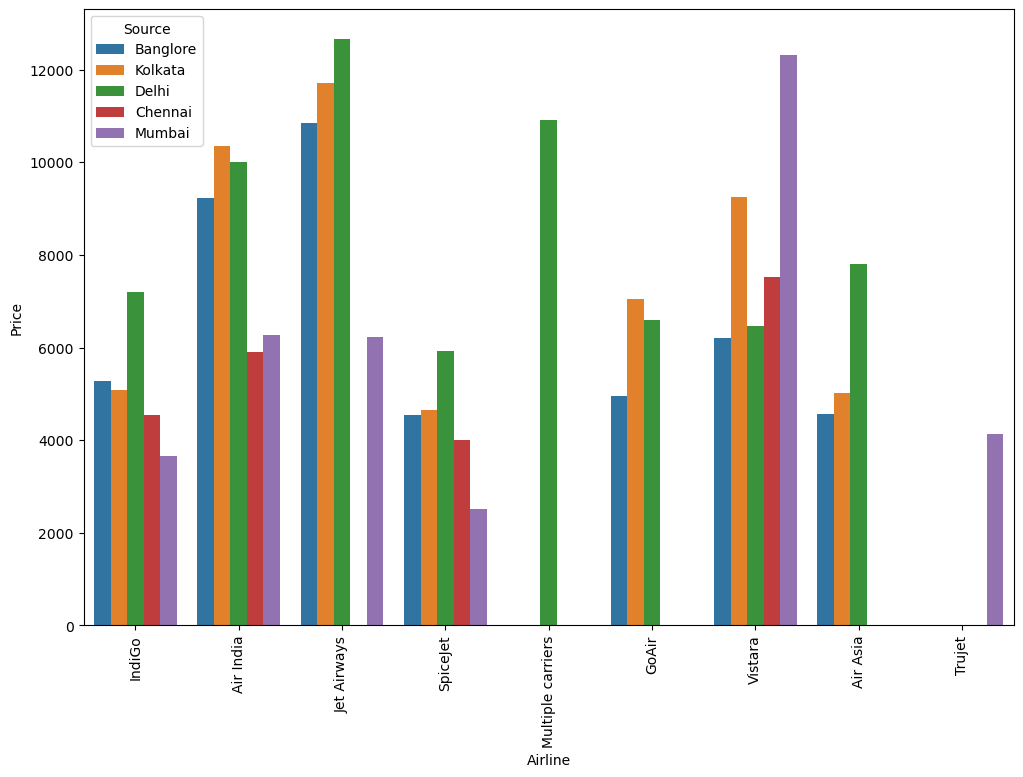

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x=eda_df['Airline'], y=eda_df['Price'],hue=eda_df['Source'], ci=False)
plt.xticks(rotation='vertical')
plt.show()

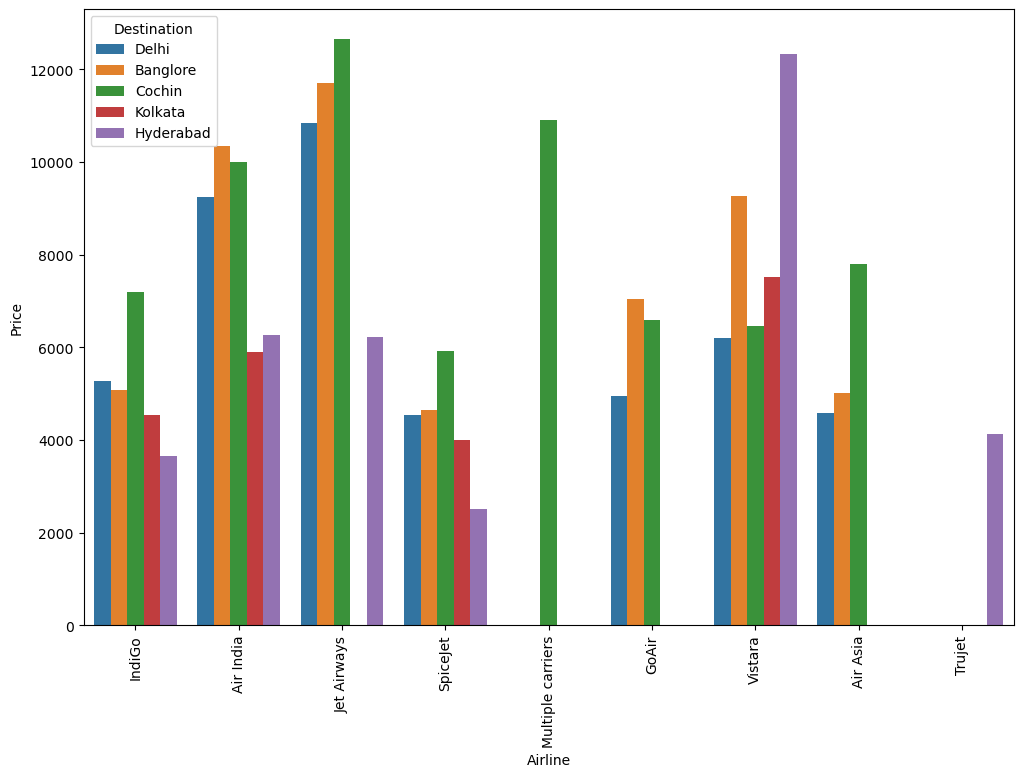

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x=eda_df['Airline'], y=eda_df['Price'],hue=eda_df['Destination'], ci=False)
plt.xticks(rotation='vertical')
plt.show()

# Insights:
- Spicejet flights are the cheapest
- Jet Airways is the costliest and the flight that take of from Delhi are the costliest
- Trujet has only one flight the source is Mumbai and Hyderbad

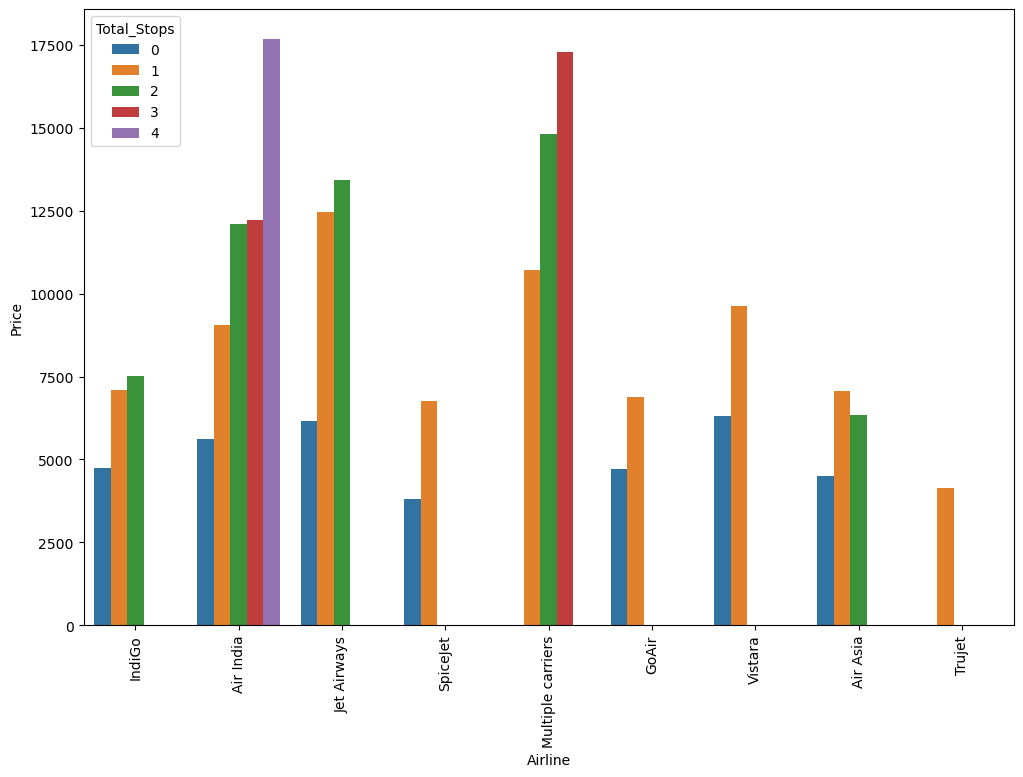

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=eda_df['Airline'], y=eda_df['Price'],hue=eda_df['Total_Stops'], ci=False)
plt.xticks(rotation='vertical')
plt.show()

# Insghts:
- Air India has the flight with most number of stops and it is the costliest.
- Multiple carriers has the second highest number of stops is also costlier.
- Flights with more number of stops are costlier.

# Model Building

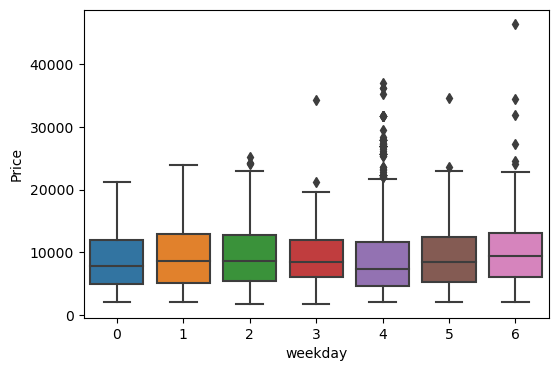

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(y=eda_df['Price'], x=eda_df['weekday'])
plt.show()

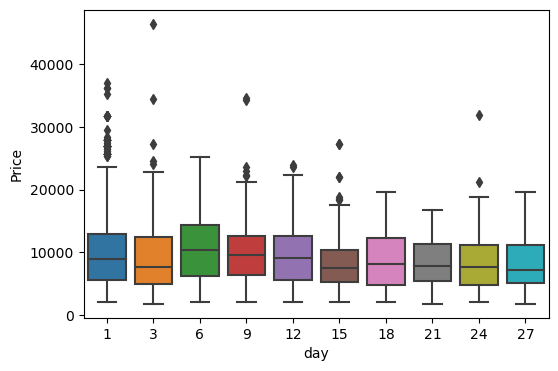

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(y=eda_df['Price'], x=eda_df['day'])
plt.show()


- Day doesn't seem to have an effect on price there does'nt seem to a relation between a day and Price
- There does'nt seem to be relation betweeen Price and weekday

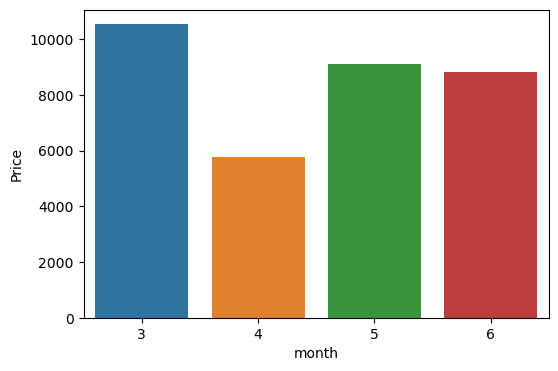

In [61]:
plt.figure(figsize=(6,4))
sns.barplot(y=eda_df['Price'], x=eda_df['month'], ci=False)
plt.show()

- Month and day dont have relation to price

<Axes: >

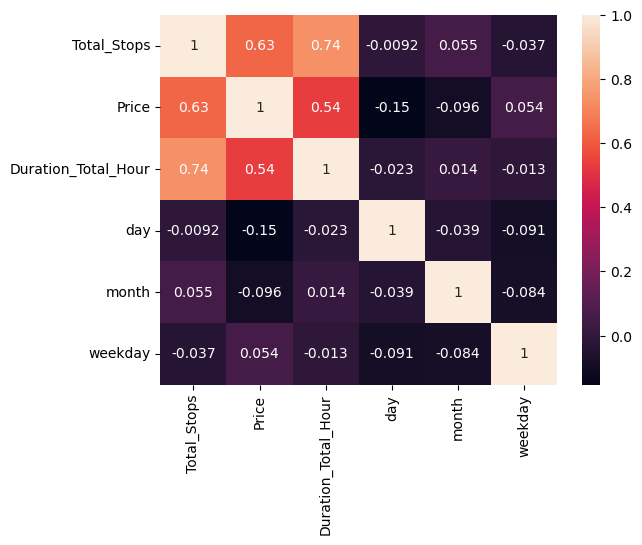

In [62]:
sns.heatmap(eda_df.corr(numeric_only=True), annot=True)

- There is high colinearity between Duration_Total_Hour and Total stops so one of the column need to be dropped

In [63]:
eda_df.drop('Total_Stops', axis=1, inplace=True)

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn

In [65]:
eda_df.reset_index(inplace=True)

In [66]:
eda_df

,index,Airline,Source,Destination,Price,Duration_Total_Hour,day,month,weekday
0,0,IndiGo,Banglore,Delhi,3897,2.83,24,3,6
1,1,Air India,Kolkata,Banglore,7662,7.42,1,5,2
2,2,Jet Airways,Delhi,Cochin,13882,19.00,9,6,6
3,3,IndiGo,Kolkata,Banglore,6218,5.42,12,5,6
4,4,IndiGo,Banglore,Delhi,13302,4.75,1,3,4
...,...,...,...,...,...,...,...,...,...
10669,10678,Air Asia,Kolkata,Banglore,4107,2.50,9,4,1
10670,10679,Air India,Kolkata,Banglore,4145,2.58,27,4,5
10671,10680,Jet Airways,Banglore,Delhi,7229,3.00,27,4,5
10672,10681,Vistara,Banglore,Delhi,12648,2.67,1,3,4


In [67]:
ohe= OneHotEncoder()
feature_array=ohe.fit_transform(eda_df[['Airline']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
new=pd.DataFrame(feature_array, columns=feature_labels)

In [68]:
new

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
eda_df=pd.concat([eda_df,new],axis=1)

In [70]:
eda_df

,index,Airline,Source,Destination,Price,Duration_Total_Hour,day,month,weekday,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,0,IndiGo,Banglore,Delhi,3897,2.83,24,3,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Air India,Kolkata,Banglore,7662,7.42,1,5,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Jet Airways,Delhi,Cochin,13882,19.00,9,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,IndiGo,Kolkata,Banglore,6218,5.42,12,5,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,IndiGo,Banglore,Delhi,13302,4.75,1,3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,10678,Air Asia,Kolkata,Banglore,4107,2.50,9,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10670,10679,Air India,Kolkata,Banglore,4145,2.58,27,4,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10671,10680,Jet Airways,Banglore,Delhi,7229,3.00,27,4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10672,10681,Vistara,Banglore,Delhi,12648,2.67,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
eda_df.drop('Airline',axis=1, inplace=True)

In [72]:
ohe= OneHotEncoder()
feature_array=ohe.fit_transform(eda_df[['Source']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
new=pd.DataFrame(feature_array, columns=feature_labels)

In [73]:
new

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
10669,0.0,0.0,0.0,1.0,0.0
10670,0.0,0.0,0.0,1.0,0.0
10671,1.0,0.0,0.0,0.0,0.0
10672,1.0,0.0,0.0,0.0,0.0


In [74]:
eda_df=pd.concat([eda_df,new],axis=1)

In [75]:
model_df=eda_df.copy()

In [76]:
ohe= OneHotEncoder()
feature_array=ohe.fit_transform(eda_df[['Destination']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
new=pd.DataFrame(feature_array, columns=feature_labels)

In [77]:
eda_df=pd.concat([eda_df,new],axis=1)

In [78]:
eda_df.drop('Source',axis=1, inplace=True)

In [79]:
eda_df.drop('Destination',axis=1, inplace=True)

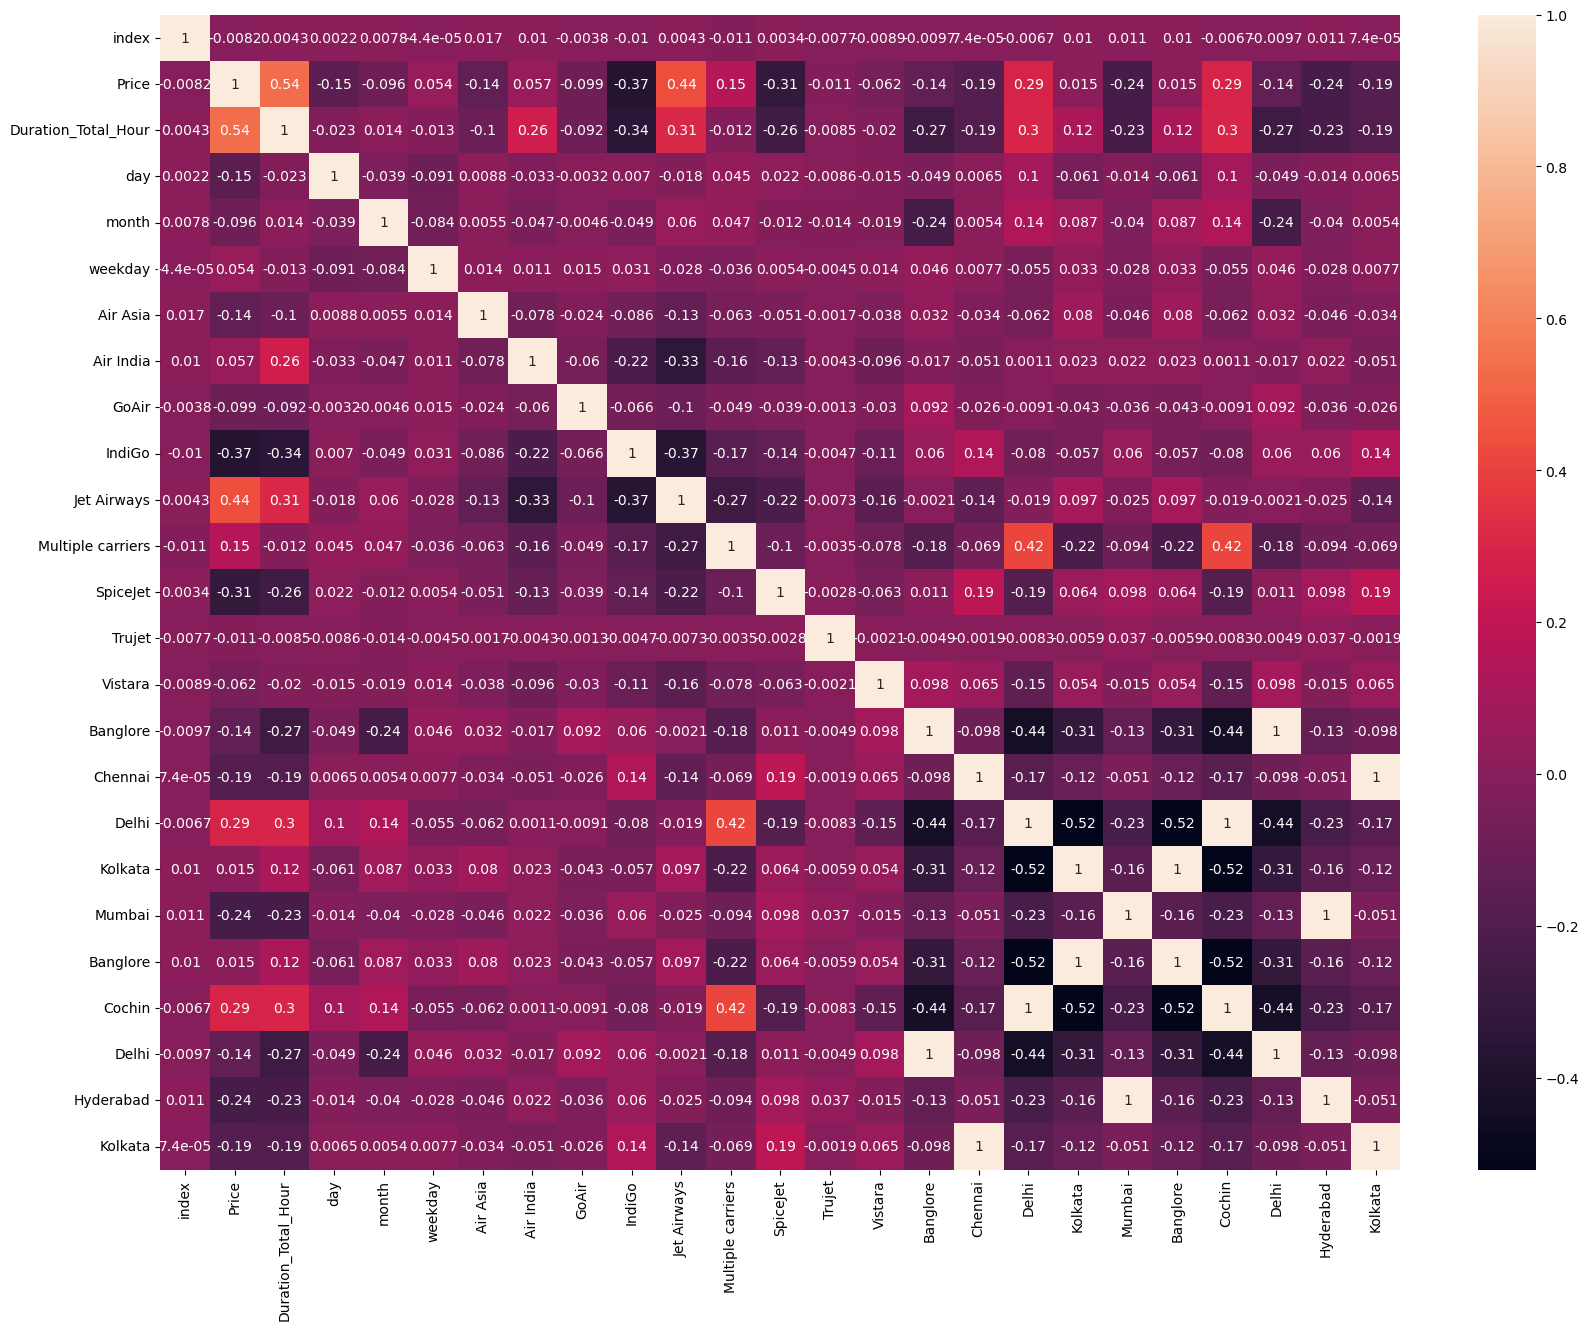

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(eda_df.corr(numeric_only=True), annot=True)
plt.savefig('corr.jpg')

In [81]:
eda_df.drop('index',axis=1,inplace=True)

In [82]:
model_df

,index,Source,Destination,Price,Duration_Total_Hour,day,month,weekday,Air Asia,Air India,...,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,0,Banglore,Delhi,3897,2.83,24,3,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Kolkata,Banglore,7662,7.42,1,5,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,Delhi,Cochin,13882,19.00,9,6,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,Kolkata,Banglore,6218,5.42,12,5,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,Banglore,Delhi,13302,4.75,1,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,10678,Kolkata,Banglore,4107,2.50,9,4,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10670,10679,Kolkata,Banglore,4145,2.58,27,4,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10671,10680,Banglore,Delhi,7229,3.00,27,4,5,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10672,10681,Banglore,Delhi,12648,2.67,1,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [83]:
model_df.drop('index', axis=1,inplace=True)

<Axes: >

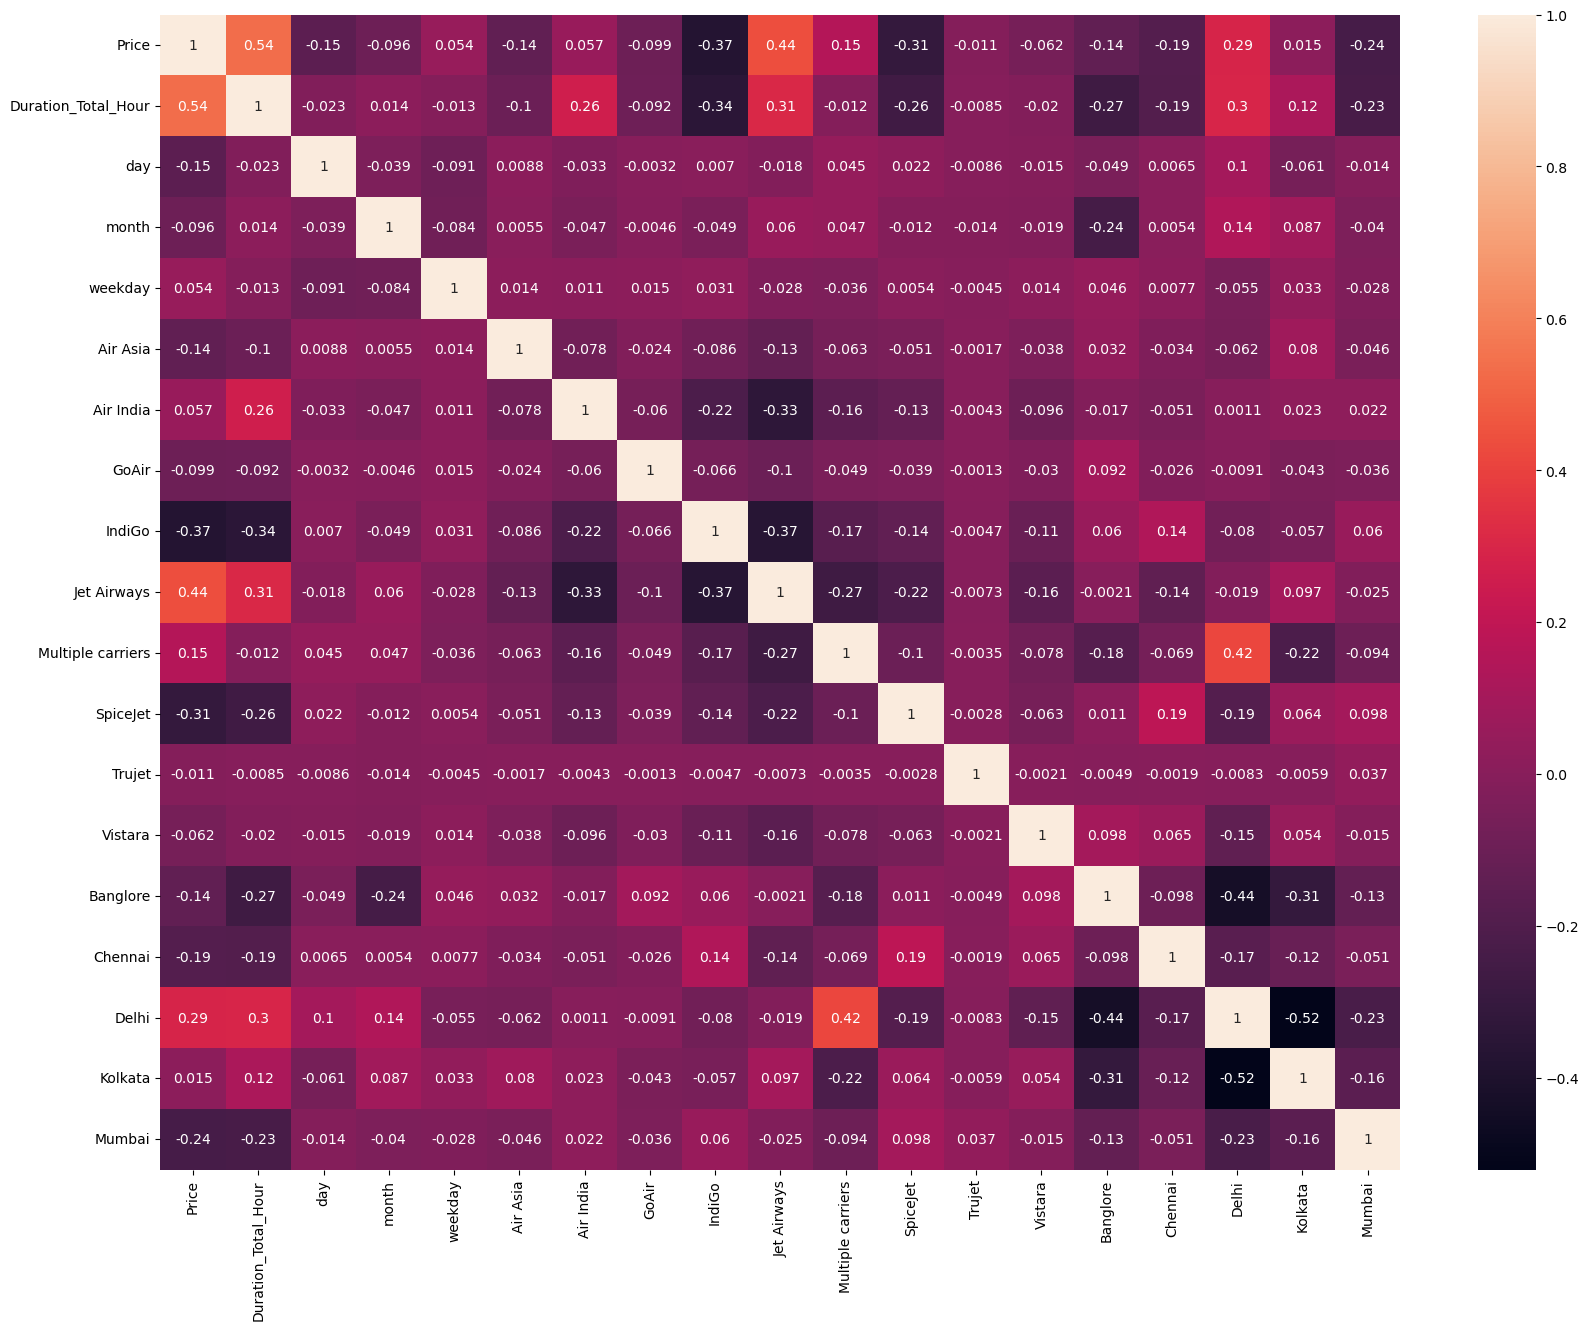

In [84]:
plt.figure(figsize=(20,15))
sns.heatmap(model_df.corr(numeric_only=True), annot=True)

In [85]:
model_df.drop(['Source','Destination'], axis=1,inplace=True)

In [86]:
model_df

,Price,Duration_Total_Hour,day,month,weekday,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3897,2.83,24,3,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7662,7.42,1,5,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13882,19.00,9,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6218,5.42,12,5,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13302,4.75,1,3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,4107,2.50,9,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10670,4145,2.58,27,4,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10671,7229,3.00,27,4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10672,12648,2.67,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Linear Regression model

# Linear regression with OLS Regression

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
model_df

,Price,Duration_Total_Hour,day,month,weekday,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,3897,2.83,24,3,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7662,7.42,1,5,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13882,19.00,9,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6218,5.42,12,5,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13302,4.75,1,3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,4107,2.50,9,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10670,4145,2.58,27,4,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10671,7229,3.00,27,4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10672,12648,2.67,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [89]:
import statsmodels.api as sm

In [90]:
x=model_df.drop(['Price'], axis= 1)
y=model_df['Price']

In [91]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(
    x_train)
x_test=scaler.transform(x_test)

In [93]:
x_test

array([[-0.92874158, -1.47508291, -0.61238176, ..., -0.86425185,
        -0.60445526, -0.2628922 ],
       [ 0.62911843, -1.47508291, -0.61238176, ...,  1.15707013,
        -0.60445526, -0.2628922 ],
       [-0.97846051, -1.23897563, -1.47187023, ..., -0.86425185,
         1.65438215, -0.2628922 ],
       ...,
       [-0.63279553, -0.88481471, -1.47187023, ..., -0.86425185,
        -0.60445526, -0.2628922 ],
       [ 1.66492961,  0.17766803,  1.10659518, ...,  1.15707013,
        -0.60445526, -0.2628922 ],
       [ 2.13844329, -0.17649289,  1.10659518, ...,  1.15707013,
        -0.60445526, -0.2628922 ]])

In [94]:
res = sm.OLS(y_train, x_train)
res.fit()

In [95]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.099
Method:                 Least Squares   F-statistic:                              59.80
Date:                Fri, 17 Nov 2023   Prob (F-statistic):                   6.70e-183
Time:                        21:55:24   Log-Likelihood:                         -90411.
No. Observations:                8539   AIC:                                  1.809e+05
Df Residuals:                    8523   BIC:                                  1.810e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1021.5482    139.391      7.329      0.000     748.308    1294.788
x2          -702.1154    105.346     -6.665      0.000    -908.620    -495.611
x3          -777.7724    108.797     -7.149      0.000    -991.040    -564.505
x4           244.4507    104.983      2.328      0.020      38.659     450.242
x5          -443.3325    101.505     -4.368      0.000    -642.306    -244.359
x6            23.7338     91.823      0.258      0.796    -156.262     203.729
x7          -289.3441    102.674     -2.818      0.005    -490.610     -88.078
x8          -917.5141     90.227    -10.169      0.000   -1094.382    -740.646
x9          1157.2671     79.682     14.524      0.000    1001.071    1313.463
x10          473.0137    101.543      4.658      0.000     273.965     672.062
x11         -786.9233    101.420     -7.759      0.000    -985.732    -588.115
x12          -32.6594    104.028     -0.314      0.754    -236.579     171.260
x13         -155.1471     99.987     -1.552      0.121    -351.147      40.852
x14         -224.0577     88.933     -2.519      0.012    -398.388     -49.728
x15         -138.2630    103.616     -1.334      0.182    -341.375      64.849
x16          480.1923     82.913      5.792      0.000     317.662     642.722
x17           39.7934     78.947      0.504      0.614    -114.962     194.549
x18         -565.7307     99.992     -5.658      0.000    -761.739    -369.722
==============================================================================
Omnibus:                     3083.712   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25342.170
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                      10.885   Cond. No.                     9.47e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
predictions = res.fit().predict(x_test)

In [97]:
predictions

array([ 1679.8687322 ,  2452.7265388 , -1503.17021862, ...,
        2480.50031208,  1624.10885799,  1990.10017153])

In [98]:
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE : 8970.168918307872
MSE : 88553854.0253279
RMSE : 9410.30573495505


In [99]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Arrival_Time_hour,Arrival_Time_minute,Duration_Total_Hour
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10,0,3897,1,10,2.83
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2,7662,13,15,7.42
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25,2,13882,4,25,19.00
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1,6218,23,30,5.42
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,1,13302,21,35,4.75
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,0,4107,22,25,2.50
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,0,4145,23,20,2.58
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,0,7229,11,20,3.00
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,0,12648,14,10,2.67


## Descision tree regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [104]:
DT = DecisionTreeRegressor().fit(x_train,y_train)
predictions = DT.predict(x_test)
r2score = r2_score (y_test,predictions)
print('R2 Score is: {}'.format(r2score))
print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

R2 Score is: 0.6717391841987966
MAE: 1551.0454170133796
MSE: 5940937.827882703
RMSE: 2437.4039115178884


## Random forest regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
RF = RandomForestRegressor().fit(x_train,y_train)
predictions = RF.predict(x_test)
r2score = r2_score (y_test,predictions)
print('R2 Score is: {}'.format(r2score))
print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

R2 Score is: 0.7653091139360712
MAE: 1398.8177019259444
MSE: 4247488.264700137
RMSE: 2060.943537484746


In [108]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[100,200,300,400,500], 'max_features' : ['auto','sqrt'], 'max_depth' : [5,10,15,20]}
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf,params,cv=10,verbose = True, n_jobs=-1)
rf_cv.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=True)

In [109]:
rf_cv.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

## ------------------------Final model result after Hyper parameter tunning---------------------------

In [115]:
Rfr=RandomForestRegressor(n_estimators = 200, max_features = 'sqrt',max_depth = 10).fit(x_train,y_train)
predictions = Rfr.predict(x_test)
r2score = r2_score (y_test,predictions)
print('R2 Score is: {}'.format(r2score))
print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

R2 Score is: 0.7962946949943885
MAE: 1432.421222909923
MSE: 3686704.272925239
RMSE: 1920.079236105958
